# Car Engines (Exploratory Data Analysis and Machine Learning)
[Dataset - Automobile.csv](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset)

### Contents

1. Data Cleaning
2. Basic EDA
3. Linear Regression Model (for Miles Per Gallon Prediction)
    - Using split data (higher accuracy)
    - Using all data
4. Linear Regression Model (for Acceleration (zero to 60mph) prediction)
5. Naive Bayes Classifier (for Country Of Origin Prediction)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
sns.set_style('dark')

In [3]:
data = pd.read_csv('Automobile.csv')
data.head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


`Checking null values`

In [5]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

`Basic stats`

In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 1. Data Cleaning

`Deleting rows with missing values`

In [7]:
data.dropna(axis=0, inplace=True)
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

`Number of cars by Country of Origin`

In [8]:
data['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

`Dropping unwanted columns`

In [ ]:
data.drop(['name', 'model_year'], axis=1, inplace=True)

## 2. Basic EDA

`Correlation Matrix`

<AxesSubplot: >

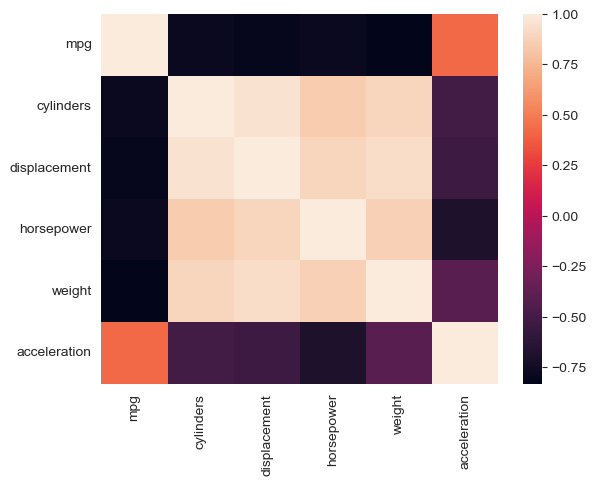

In [10]:
sns.heatmap(data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].corr())
plt.show()

`Checking linear relationships`

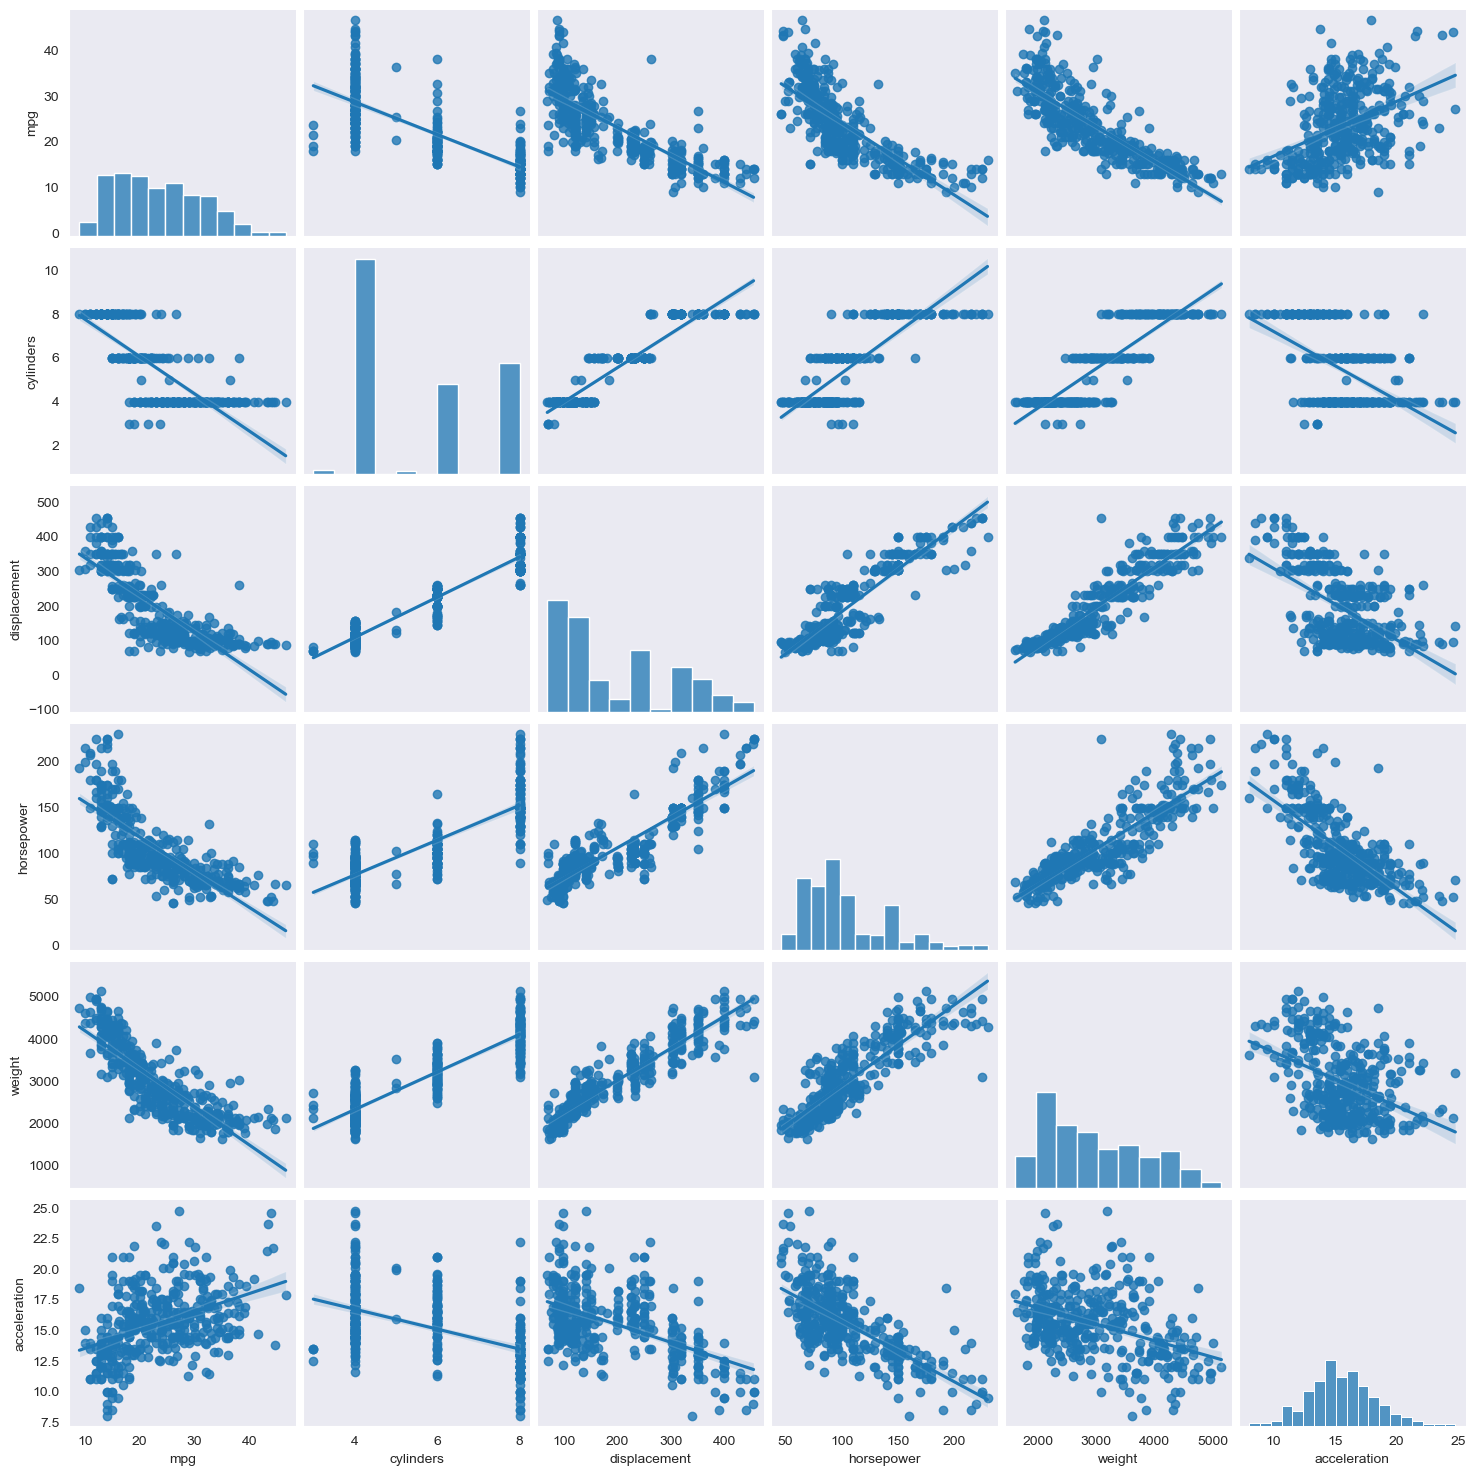

In [11]:
sns.pairplot(data=data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']], kind='reg')
plt.show()

## 3. Linear Regression Model (for Miles Per Gallon prediction)
### Model Training Using Split Data

In [20]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = data[['mpg']]

In [21]:
sizes = [0.35, 0.30, 0.25, 0.20, 0.15, 0.1]
maxr2 = 0

for size in sizes:
    for i in range(0, 10000):    
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=size, random_state=i)
        model = LinearRegression()
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(Y_test, y_pred)
        
        if i % 1000 == 0:
            print(f'--------------------------------------------------------------------- Size {size} Iteration {i} ')
        
        if r2 > maxr2:
            print(f'R2 {round(r2, 8)} -> Train Size {size*100}%  Random State: {i}')
            maxr2 = r2

--------------------------------------------------------------- Size 0.35 Iteration 0 
R2 0.69287581 -> Train Size 35.0%  Random State: 0
R2 0.71046009 -> Train Size 35.0%  Random State: 1
R2 0.71797653 -> Train Size 35.0%  Random State: 2
R2 0.73979794 -> Train Size 35.0%  Random State: 3
R2 0.74814729 -> Train Size 35.0%  Random State: 18
R2 0.76226324 -> Train Size 35.0%  Random State: 38
R2 0.76909542 -> Train Size 35.0%  Random State: 145
R2 0.77609867 -> Train Size 35.0%  Random State: 536
--------------------------------------------------------------- Size 0.35 Iteration 1000 
R2 0.78808807 -> Train Size 35.0%  Random State: 1046
--------------------------------------------------------------- Size 0.35 Iteration 2000 
--------------------------------------------------------------- Size 0.35 Iteration 3000 
--------------------------------------------------------------- Size 0.35 Iteration 4000 
--------------------------------------------------------------- Size 0.35 Iteration 5

`Best Parameters - Split Size = 0.15 Random State = 4306`

### Model Training Using All Data

In [26]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = data[['mpg']]

In [27]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(f'R2 Score - {r2_score(y, y_pred)}')

R2 Score - 0.7076926326770516


## 4. Linear Regression Model (for Acceleration (zero to 60mph) prediction)
### Model Training Using Split Data

In [28]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight']]
y = data[['acceleration']]

In [ ]:
sizes = [0.35, 0.30, 0.25, 0.20, 0.15, 0.1]
maxr2 = 0

for size in sizes:
    for i in range(0, 10000):    
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=size, random_state=i)
        model = LinearRegression()
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(Y_test, y_pred)
        
        if i % 1000 == 0:
            print(f'--------------------------------------------------------------------- Size {size} Iteration {i} ')
        
        if r2 > maxr2:
            print(f'R2 {round(r2, 8)} -> Train Size {size*100}%  Random State: {i}')
            maxr2 = r2

--------------------------------------------------------------------- Size 0.35 Iteration 0 
R2 0.62772347 -> Train Size 35.0%  Random State: 0
R2 0.6367288 -> Train Size 35.0%  Random State: 4
R2 0.65166941 -> Train Size 35.0%  Random State: 12
R2 0.65326808 -> Train Size 35.0%  Random State: 27
R2 0.66389143 -> Train Size 35.0%  Random State: 50
R2 0.69095061 -> Train Size 35.0%  Random State: 59
R2 0.69355832 -> Train Size 35.0%  Random State: 452
R2 0.70212838 -> Train Size 35.0%  Random State: 543
--------------------------------------------------------------------- Size 0.35 Iteration 1000 
R2 0.71474345 -> Train Size 35.0%  Random State: 1196
--------------------------------------------------------------------- Size 0.35 Iteration 2000 
--------------------------------------------------------------------- Size 0.35 Iteration 3000 
R2 0.72010465 -> Train Size 35.0%  Random State: 3972
--------------------------------------------------------------------- Size 0.35 Iteration 4000 
